# trie structure

In [1]:
from graphviz import Source

In [2]:
class TrieNode:
    counter = 1
    
    def __init__(self,letter = '', parent = None, depth = 0):
        self.letter = letter
        self.parent = parent
        self.depth = depth
        self.children = {}
        self.id = TrieNode.counter
        self.label = letter
        TrieNode.counter += 1
    
    # this function allows us to graft either by passing a whole string to the root or end of a suffix to the head
    def graft(self, string):
        node = self
        for letter in string:
            if not letter in node.children.keys():
                node.children[letter] = TrieNode(letter,node,node.depth+1)
            node = node.children[letter]
        return node
    
    
    
    # functions for visualisation
    def dot_node(self):
        return f'{self.id} [label="", shape="point"];'
    
    def dot_edges(self):
        result = []
        for child in self.children.values():
            result.append(f'{self.id} -> {child.id}[arrowhead="none", label=" {child.label}"];')
        return "\n".join(result)
    
    def get_all_children(self):
        result = [self]
        for child in self.children.values():
            result += child.get_all_children()
        return result 
    
    def show_tree(self):
        nodes = self.get_all_children()
        TrieNode.show_graph(nodes)
    
    @staticmethod
    def show_graph(nodes):
        result = "digraph{\n"
        ranks = {}

        for node in nodes:
            result += node.dot_node() + "\n"
            result += node.dot_edges() + "\n"
            if(node.depth not in ranks):
                ranks[node.depth] = []
            ranks[node.depth].append(node.id)
        for key, values in ranks.items():
            values = " ".join([f"{v};" for v in values])
            result += " { rank=same; " + values + "}\n"
        result += "\n}"
        s = Source(result)
        display(s)   

In [3]:
class Trie:
    def __init__(self,text):
        self.root = TrieNode()
        self.leafs = []
        self.leafs.append(self.root.graft(text))
        leaf = self.leafs[0]
        for i in range(1,len(text)):
            suffix = text[i:]
            head = self.find(suffix,leaf)
            suffix_end = suffix[head.depth:]
            leaf = head.graft(suffix_end)
        
        
    def find(self,suffix,leaf):
        node = self.root
        i = 0
        while suffix[i] in node.children.values():
            node = node.children
            i+=1
        return node
    
    def show_trie(self):
        self.root.show_tree()  

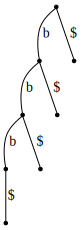

In [4]:
text0 = "bbb$"
trie0 = Trie(text0)
trie0.show_trie()

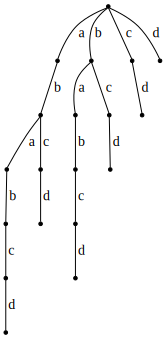

In [5]:
text1 = "ababcd"
trie1 = Trie(text1)
trie1.show_trie()